# Project: Investigate a Dataset
## Titanic data
Data Analysis process starts with the question we want to find the answer for (problem we want to solve). 
In this case I want to find answer for the question "What factors made people more likely to survive?"
Titanic Data contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

## Data wrangle phase
I start process of data wrangling by loading data. I should be sure that data is in good format. If I found some problems I must fix it or clean the data if it's nessesary

In [1]:
from matplotlib.pyplot import pie, axis, show
import pandas as pd
import matplotlib.pyplot as plt
    
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data['cnt'] = 1 # New column I will use for count
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


This is example of data from dataset.  

In [2]:
#Checking data types
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
cnt              int64
dtype: object

Data types seem great to me!

I will focus on fields like Survived, Pclass, Sex, Age, Fare, Embarked.
I want to be sure that all columns I will use doesn't have missing values.

In [3]:
print('Number of empty rows in dataset')
titanic_data.isnull().sum()

Number of empty rows in dataset


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cnt              0
dtype: int64

Column Age is important for me, so if I want to get more accurate results, I should do something about that.
Coulumn Cabin has most missing values, but I will not analyse it now, so I will let it be.
I will analyze Embarked, but I will not do something about this 2 missing values. I will not delete this rows, but I will handle them as "Unknown".

There's several ways to sovle promlem with missing age:
1. Find missing age in Google. It will gime me most correct results, but I will take time.
2. I noticed that field "Name" contains title. So I could use it. I can find average age for every title (in google or in dataset) and replace empty values with it, depending on what title has a person, of course.

For this project I will go for number 2.

In [4]:
# I will create a new column to extract title
titanic_data['Title'] = titanic_data['Name'].apply(lambda x: x[x.find(', ')+2:x.find('.')])
# And fill empty age cells with average values.
titanic_data["Age"] = titanic_data.groupby("Title")['Age'].transform(lambda x: x.fillna(x.mean()))
#I will display for clarity what is an averge age for every Title, based on data from data set 
titanic_avg_by_title = titanic_data.groupby('Title')['Age'].mean().reset_index()
titanic_avg_by_title

,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Don,40.000000
3,Dr,42.000000
4,Jonkheer,38.000000
5,Lady,48.000000
6,Major,48.500000
7,Master,4.574167
8,Miss,21.773973
9,Mlle,24.000000


## Data exploration phase

In [5]:
def AgeClassifier(age):
    if age != age:
        return 'Unknown'
    elif age <= 2:
        return 'Infant'
    elif age <= 13:
        return 'Child'
    elif age <= 20:
        return 'Teen'
    elif age <= 64:
        return 'Adult'
    else: return '65+'

titanic_data['AgeCategory'] = titanic_data['Age'].map(AgeClassifier) # New column which I will use for analysis of age    

### Total numbers

In [6]:
titanic_data_survived = titanic_data[titanic_data['Survived'] == 1] # Survived people data frame
titanic_data_dead = titanic_data[titanic_data['Survived'] == 0] # Dead people data frame

print('Total numbers of passengers: ' + str(len(titanic_data)))
print('Number of survived passengers: ' + str(len(titanic_data_survived)))
print('Number of dead passengers: ' + str(len(titanic_data) - len(titanic_data_survived)))

Total numbers of passengers: 891
Number of survived passengers: 342
Number of dead passengers: 549


### Sex
Let's see proportions between males and females on board

In [7]:
titanic_group_sex = titanic_data.groupby('Sex').size()
titanic_group_sex_surv = titanic_data_survived.groupby('Sex').size()
print ('Female vs Male on board')
print (titanic_group_sex)
print ('')
print ('Female vs Male survived')
print (titanic_group_sex_surv)
print ('')
print ('Female vs Male dead')
print (titanic_group_sex - titanic_group_sex_surv)

Female vs Male on board
Sex
female    314
male      577
dtype: int64

Female vs Male survived
Sex
female    233
male      109
dtype: int64

Female vs Male dead
Sex
female     81
male      468
dtype: int64


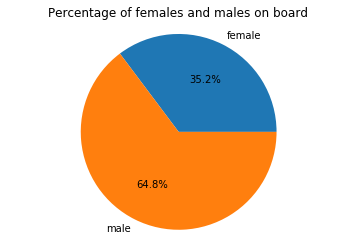

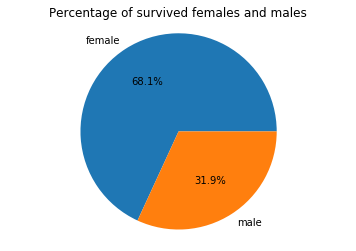

In [8]:
plt.figure(0)
titanic_group_sex_pcent = titanic_group_sex /len(titanic_data)
plt.title('Percentage of females and males on board')
plt.pie(titanic_group_sex_pcent, labels=titanic_group_sex_pcent.index, autopct='%1.1f%%');
plt.axis('equal') 

plt.figure(1)
titanic_group_sex_surv_pcent = titanic_group_sex_surv /len(titanic_data_survived)
plt.title('Percentage of survived females and males')
plt.pie(titanic_group_sex_surv_pcent, labels=titanic_group_sex_surv_pcent.index, autopct='%1.1f%%');
plt.axis('equal') 

plt.show()

As we se in pie charts, there were almost twice men on board than females, but females was almost 68% of survivors.
This means that female sex was one of the factors made people more likely to survive.
But let's see if age is also one of these factors.

### Age 
I think about not look to age directly, but devide into age classes infant (0-2 y.o.), child (2-13 y.o.), teen (13-20 y.o.), adult (20-64) and 65+.
There's different ways to classifier the age. These classes and age range was choosen by me. 

Possibility of survival for different age groups
AgeCategory
65+        9.090909
Adult     36.872310
Child     56.862745
Infant    62.500000
Teen      37.037037
dtype: float64


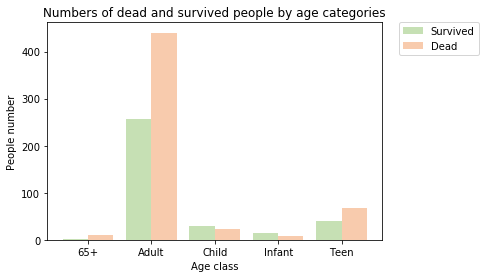

In [9]:
def draw_bar_chart(data_survived, data_dead, xlabels, chart_title, xlabel_name, ylabel_name):
    ax = plt.subplot(111)
    ax.bar(data_survived.index-0.2, data_survived['cnt'],width=0.4,color='#c6e0b4',align='center', label="Survived")
    ax.bar(data_dead.index+0.2, data_dead['cnt'],width=0.4,color='#f8cbad',align='center', label="Dead")
    ax.set_xticks(data_survived.index)
    ax.set_xticklabels(xlabels)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(xlabel_name)
    plt.ylabel(ylabel_name)
    plt.title(chart_title)
    plt.show()

def group_to_dataframe(data,column_name):
    return data.groupby([column_name])['cnt'].sum().reset_index()

titanic_age_survived = group_to_dataframe(titanic_data_survived,'AgeCategory')
titanic_age_dead = group_to_dataframe(titanic_data_dead,'AgeCategory') 

titanic_age_pcent = titanic_data_survived.groupby(['AgeCategory']).size() / titanic_data.groupby(['AgeCategory']).size() * 100  
print ('Possibility of survival for different age groups')
print (titanic_age_pcent)

draw_bar_chart(titanic_age_survived,titanic_age_dead,titanic_age_survived['AgeCategory'],
               'Numbers of dead and survived people by age categories', 'Age class', 'People number')

We see here, that infants and children have had a much bigger change to survive than 65+ persons. And about 1.6 times more chance to survive than teens and adults. But of course we must remember that we had 177 empty values in dataset, which was replaces by average age of title.

###	Ticket class (Pclass)

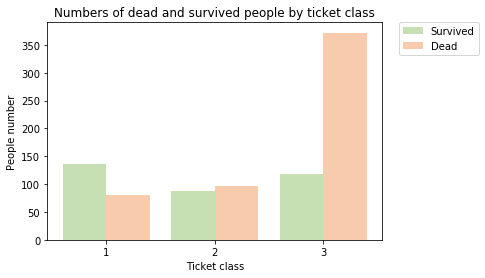

In [10]:
titanic_pclass_survived = group_to_dataframe(titanic_data_survived, 'Pclass')
titanic_pclass_dead = group_to_dataframe(titanic_data_dead, 'Pclass')

draw_bar_chart(titanic_pclass_survived,titanic_pclass_dead,titanic_pclass_survived['Pclass'],
               'Numbers of dead and survived people by ticket class', 'Ticket class', 'People number')

Trend shows that chance to survive are smaller with higher ticket class number.

###	Fare

I believe that ticket class and fare are correlated.

In [11]:
def correlation(x, y):
    correlation = x.corr(y)#corrcoef(x,y)
    return correlation
Pclass = titanic_data['Pclass']
Fare = titanic_data['Fare']
print(correlation(Pclass,Fare))

-0.549499619944


Negative value of correlation coefficient means that lower class pays higher price. Connection between fare and ticket class is middle (not weak and not very strong). I expected it will be a little bit heigher.  

In [12]:
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

I see that maximum price for ticket is 512.32. but average price is 32.2. It's very interesting. 75% of tickets have price 31 and lower.

We see that number of survived people are higher than number of dead if ticket price is above 50.

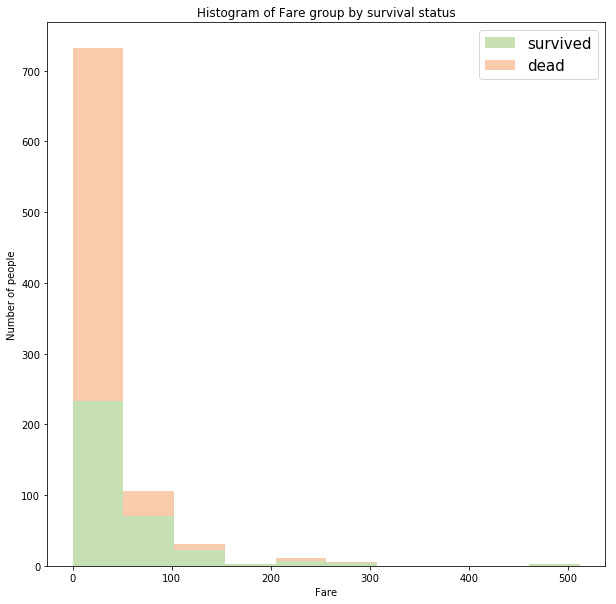

In [13]:
def draw_hist_fare():
    survival_status = ['survived', 'dead']
    fig = plt.figure(figsize = (10,10)) 
    ax = fig.gca()    
    ax.hist([titanic_fare_survived['Fare'],titanic_fare_dead['Fare']], color=['#c6e0b4','#f8cbad'], 
             weights = [titanic_fare_survived['cnt'],titanic_fare_dead['cnt']], stacked=True, label=survival_status)
    plt.xlabel('Fare')
    plt.ylabel('Number of people')
    ax.legend(prop={'size': 15})
    plt.title('Histogram of Fare group by survival status')
    plt.show()

titanic_fare_survived = group_to_dataframe(titanic_data_survived, 'Fare')
titanic_fare_dead = group_to_dataframe(titanic_data_dead, 'Fare')
draw_hist_fare()

In [14]:
#let's group titanic data by Embarked and Suvived columns
titanic_emb_surv = titanic_data.groupby(['Embarked','Survived']).size()
print(titanic_emb_surv)
print('')
titanic_embarked_groups = titanic_data_survived.groupby(['Embarked']).size() / titanic_data.groupby(['Embarked']).size() * 100  
print('Possibility of survival for different ports of Embarkation')
print(titanic_embarked_groups)
print('')
print('Where C = Cherbourg, Q = Queenstown, S = Southampton')

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

Possibility of survival for different ports of Embarkation
Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64

Where C = Cherbourg, Q = Queenstown, S = Southampton


It's just 33,7% of people whoe came on board in Southampton did survived. But can we just conclude that if this person came on bord in Cherbourg, he had a more change to survive? I don't think so. 
I think it's an indirect factor

## Conclution 
Dataset I analyzed in this report contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 177 rows are missing age value. During analysis I replaced missing values with title's average age.
Embarked column had 2 missing values and they are not included in analysis. Result of my analysis would be more accurate with full dataset.

First factor I analyzed was sex: statistics shows that women was more likely to survive than men.
<br>When I devided age to classes (infant, child, teenager, adult and 65+), I found out that percetange of survived infants and children under 13 are higher than adults and especially 65+ people. This result are not exact because of missing values. 
<br>Ananlysing ticket class and fare I observe a tendency that there were more survied people in higher class.

So what factors made people more likely to survive?
<br>Based on dataset I have and analyze I've done I could say: ["Women and children first"](https://en.wikipedia.org/wiki/Women_and_children_first)

I didn't analyze every information I've had about passengers, so in further research I could:
1. look more into titles I retrived from Name column and split it into groups (from low range to royal, if it's possible). 
2. Analyze survival status by ticket class in combination with fare or cabin deck. 
3. find answer to question "Did bigger families were less likely to survive?".       